In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
import pandas as pd 
data=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_dataset_refined_dummy.csv')

In [3]:
data.columns

Index(['Classification', 'Orbital period', 'Transit Duration', 'Transit Depth',
       'Planet radius value', 'Planet Insolation Value',
       'Planetary Equilibrium Temp.', 'Stellar Effective Temp.',
       'Stellar Surface Gravity', 'Stellar Radius'],
      dtype='object')

In [4]:
data.head()

,Classification,Orbital period,Transit Duration,Transit Depth,Planet radius value,Planet Insolation Value,Planetary Equilibrium Temp.,Stellar Effective Temp.,Stellar Surface Gravity,Stellar Radius
0,0,2.171348,2.017220,656.886099,5.818163,22601.948580,3127.204052,10249.0,4.19000,2.169860
1,1,1.931646,3.166000,1286.000000,11.215400,44464.500000,4045.000000,7070.0,4.03000,2.010000
2,0,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,9219.0,4.14000,2.150000
3,1,6.998921,3.953000,2840.000000,14.775200,448.744000,1282.000000,6596.0,3.71000,2.700000
4,1,1.430370,1.616599,18960.712290,13.187450,1281.240825,1525.904809,5600.0,4.48851,0.890774


<Axes: >

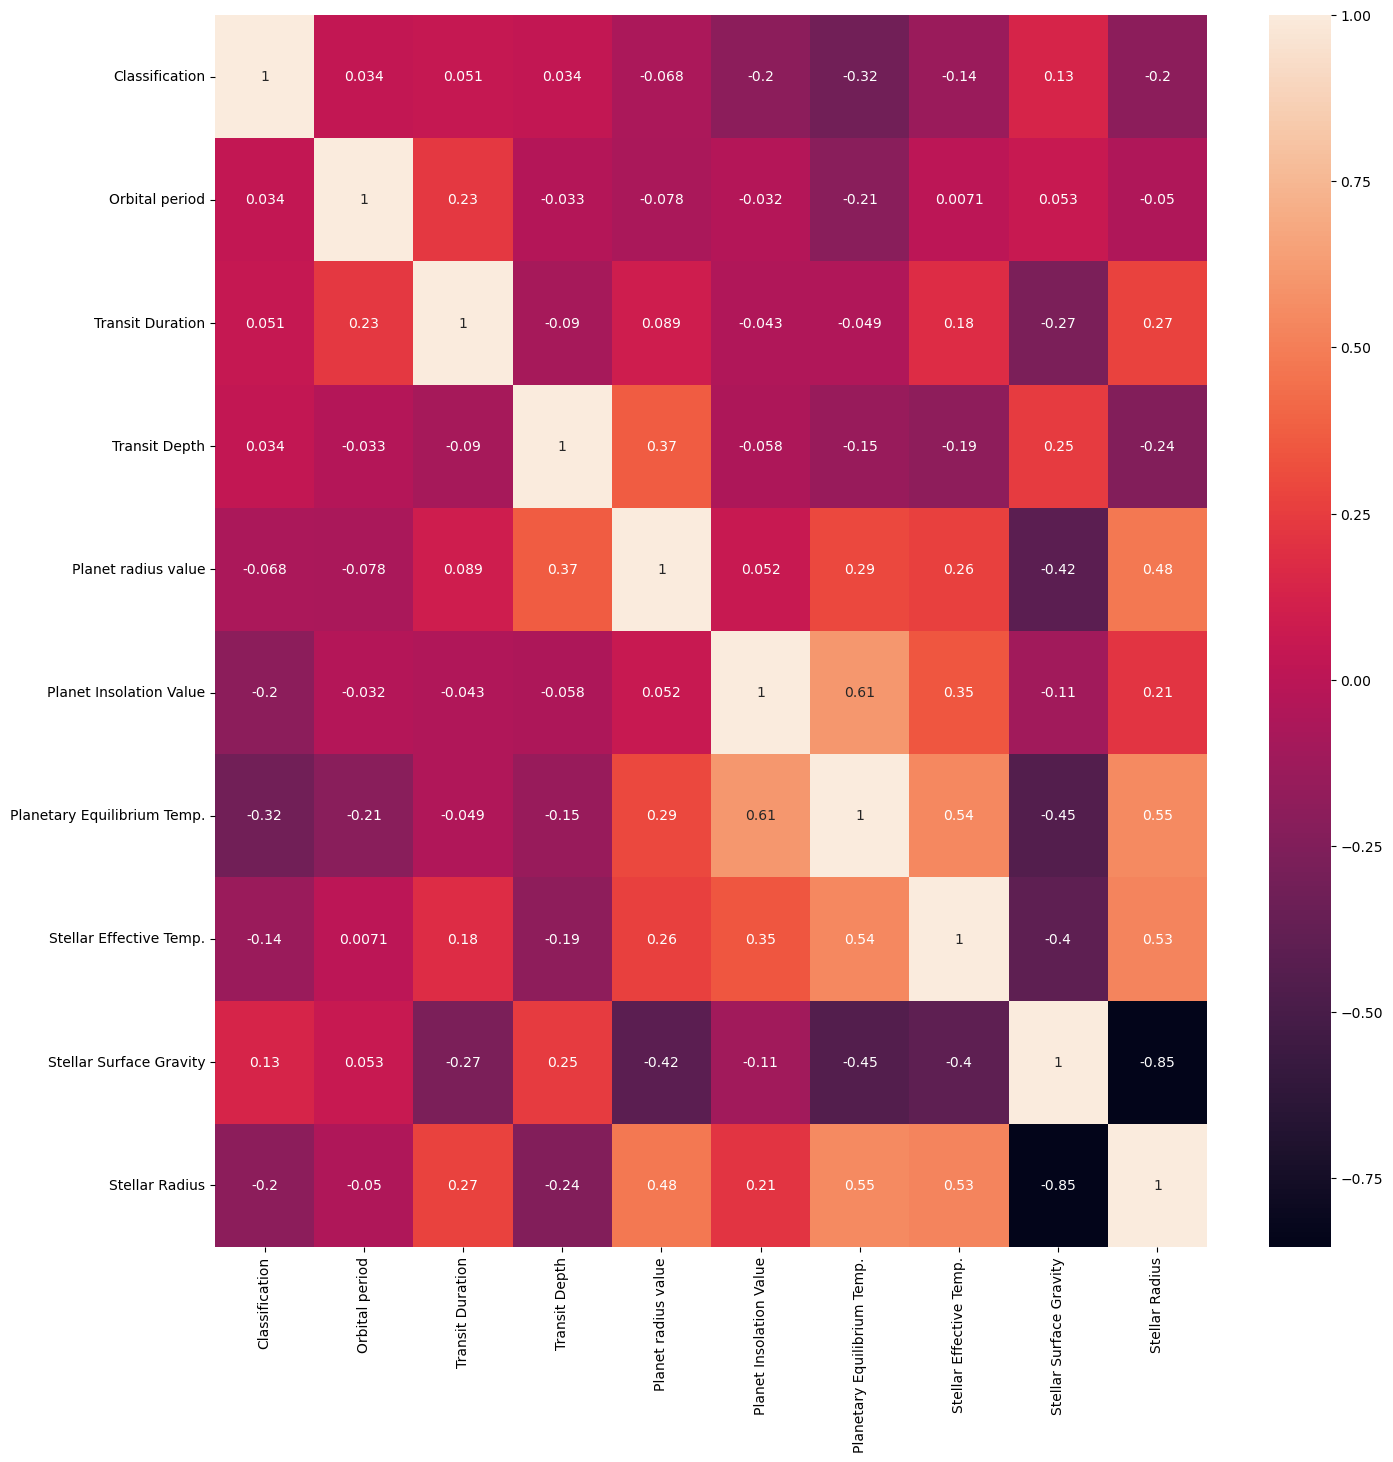

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.figure(figsize=(16,16))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)

In [6]:
data.drop_duplicates(keep='first').shape

(6237, 10)

In [33]:
X=data.drop(columns=['Classification'],axis=0)
X

,Orbital period,Transit Duration,Transit Depth,Planet radius value,Planet Insolation Value,Planetary Equilibrium Temp.,Stellar Effective Temp.,Stellar Surface Gravity,Stellar Radius
0,9.488036,2.95750,616.0,2.26,93.59,793.0,5455.0,4.467,0.927
1,54.418383,4.50700,875.0,2.83,9.11,443.0,5455.0,4.467,0.927
2,19.899140,1.78220,10800.0,14.60,39.30,638.0,5853.0,4.544,0.868
3,1.736952,2.40641,8080.0,33.46,891.96,1395.0,5805.0,4.564,0.791
4,2.525592,1.65450,603.0,2.75,926.16,1406.0,6031.0,4.438,1.046
...,...,...,...,...,...,...,...,...,...
9196,0.527699,3.22210,1580.0,29.35,4500.53,2088.0,5638.0,4.529,0.903
9197,1.739849,3.11400,48.5,0.72,1585.81,1608.0,6119.0,4.444,1.031
9198,0.681402,0.86500,104.0,1.07,5713.41,2218.0,6173.0,4.447,1.041
9199,333.486169,3.19900,639.0,19.30,22.68,557.0,4989.0,2.992,7.824


In [34]:
Y=data['Classification']
Y

0       1
1       1
2       1
3       0
4       1
       ..
9196    0
9197    1
9198    0
9199    1
9200    0
Name: Classification, Length: 9201, dtype: int64

In [35]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=3)
train_x.head()

,Orbital period,Transit Duration,Transit Depth,Planet radius value,Planet Insolation Value,Planetary Equilibrium Temp.,Stellar Effective Temp.,Stellar Surface Gravity,Stellar Radius
2273,1.681891,2.99200,83.2,1.27,2432.14,1790.0,5827.0,4.191,1.374
8135,6.490662,3.47128,195000.0,33.46,35.28,621.0,4448.0,4.684,0.563
5672,1.332561,4.10300,151.0,2.16,6330.12,2276.0,6468.0,4.107,1.602
6583,208.047137,3.22000,288.0,2.05,4.12,363.0,5991.0,4.175,1.200
7815,1.729333,3.63100,29.7,0.69,2196.53,1745.0,5921.0,4.220,1.211


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [11]:
from sklearn.multioutput import MultiOutputRegressor

In [16]:
LR_model=LinearRegression()
LR_model.fit(train_x,train_y)

LinearRegression()

In [17]:
y_predicted_LR=LR_model.predict(test_x)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(test_y,y_predicted_LR)

r2=r2_score(test_y,y_predicted_LR)

In [19]:
print(mse,r2)

0.12627243511150837 0.11447883664236147


In [22]:
RF=RandomForestClassifier(n_estimators=220,max_depth=87)

In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [23]:
model_rf1=RF.fit(train_x,train_y)
y_predicted_RF=model_rf1.predict(test_x)


In [36]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Example: assume you have data ready
# X_train, X_test, y_train, y_test

# 1️⃣ Define a pipeline: scaling → random forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 2️⃣ Define hyperparameter distributions for Randomized Search
param_distributions = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(5, 50),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 5),
    'rf__bootstrap': [True, False]
}

# 3️⃣ Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,            # number of random combinations to try
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # use 'r2' or 'neg_mean_squared_error' for regression
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# 4️⃣ Fit the model
random_search.fit(train_x,train_y)
# 5️⃣ Get the best pipeline
best_model = random_search.best_estimator_

print("\n✅ Best Parameters found:")
print(random_search.best_params_)

# 6️⃣ Evaluate on test data
y_pred = best_model.predict(test_x)

print("\n🎯 Test Accuracy:", accuracy_score(test_y, y_pred))
print("\nClassification Report:\n", classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best Parameters found:
{'rf__bootstrap': True, 'rf__max_depth': 25, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3, 'rf__n_estimators': 314}

🎯 Test Accuracy: 0.8413905486148832

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       951
           1       0.81      0.87      0.84       890

    accuracy                           0.84      1841
   macro avg       0.84      0.84      0.84      1841
weighted avg       0.84      0.84      0.84      1841

Confusion Matrix:
 [[774 177]
 [115 775]]


In [43]:
data2=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\TESS_dataset_refined_dummy.csv')
tess_test=data2.drop(columns='Classification',axis=0)
tess_true=data2['Classification']
tess_pred=best_model.predict(tess_test)

print(accuracy_score(tess_true,tess_pred))
print(classification_report(tess_true,tess_pred))
prediction=tess_pred.astype(str)
for i in range(len(prediction)):
            
            if prediction[i]=='0':
                prediction[i]=("not an exo-planet")
            elif prediction[i]=='1':
                prediction[i]=("likely an exo-planet")
print(prediction)

0.6947739660147483
              precision    recall  f1-score   support

           0       0.30      0.65      0.41      1009
           1       0.91      0.70      0.79      5229

    accuracy                           0.69      6238
   macro avg       0.60      0.68      0.60      6238
weighted avg       0.81      0.69      0.73      6238

['likely an exo-planet' 'not an exo-planet' 'not an exo-planet' ...
 'not an exo-planet' 'not an exo-planet' 'not an exo-planet']


In [4]:
data2=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_tess_combined_dummy.csv')
X=data2.drop(columns=['Classification'],axis=0)
Y=data2['Classification']
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=3)
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint

# Example: assume you have data ready
# X_train, X_test, y_train, y_test

# 1️⃣ Define a pipeline: scaling → random forest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 2️⃣ Define hyperparameter distributions for Randomized Search
param_distributions = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': randint(5, 50),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 5),
    'rf__bootstrap': [True, False]
}

# 3️⃣ Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,            # number of random combinations to try
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # use 'r2' or 'neg_mean_squared_error' for regression
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# 4️⃣ Fit the model
random_search.fit(train_x,train_y)
# 5️⃣ Get the best pipeline
best_model = random_search.best_estimator_

print("\n✅ Best Parameters found:")
print(random_search.best_params_)

# 6️⃣ Evaluate on test data
y_pred = best_model.predict(test_x)

print("\n🎯 Test Accuracy:", accuracy_score(test_y, y_pred))
print("\nClassification Report:\n", classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))



Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best Parameters found:
{'rf__bootstrap': True, 'rf__max_depth': 39, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 149}

🎯 Test Accuracy: 0.8400259067357513

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76      1667
           1       0.85      0.91      0.88      2965

    accuracy                           0.84      4632
   macro avg       0.84      0.81      0.82      4632
weighted avg       0.84      0.84      0.84      4632

Confusion Matrix:
 [[1181  486]
 [ 255 2710]]


In [40]:
data2.columns

Index(['Classification', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'Orbital period', 'koi_time0bk', 'koi_impact',
       'Transit Duration', 'Transit Depth', 'Planet radius value',
       'Planetary Equilibrium Temp.', 'Planet Insolation Value',
       'koi_model_snr', 'Stellar Effective Temp.', 'Stellar Surface Gravity',
       'Stellar Radius'],
      dtype='object')

In [35]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform, randint
from xgboost import XGBClassifier  # or XGBRegressor

# Example: assume you already have
# X_train, X_test, y_train, y_test

# 1️⃣ Define pipeline: scaling → XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        objective='binary:logistic',   # change for multi-class: 'multi:softmax'
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ))
])

# 2️⃣ Define hyperparameter distributions for Randomized Search
param_distributions = {
    'xgb__n_estimators': randint(100, 500),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'xgb__subsample': uniform(0.6, 0.4),        # 0.6–1.0
    'xgb__colsample_bytree': uniform(0.6, 0.4), # 0.6–1.0
    'xgb__gamma': uniform(0, 0.5),
    'xgb__min_child_weight': randint(1, 6)
}

# 3️⃣ Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,              # number of random combinations to try
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # for classification; use 'r2' for regression
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# 4️⃣ Fit the model
random_search.fit(train_x, train_y)

# 5️⃣ Get the best pipeline
best_model = random_search.best_estimator_

print("\n✅ Best Parameters found:")
print(random_search.best_params_)

# 6️⃣ Evaluate on test data
y_pred = best_model.predict(test_x)

print("\n🎯 Test Accuracy:", accuracy_score(test_y, y_pred))
print("\nClassification Report:\n", classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\purva\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best Parameters found:
{'xgb__colsample_bytree': np.float64(0.9233589392465844), 'xgb__gamma': np.float64(0.15230688458668534), 'xgb__learning_rate': np.float64(0.03930163420191516), 'xgb__max_depth': 6, 'xgb__min_child_weight': 4, 'xgb__n_estimators': 466, 'xgb__subsample': np.float64(0.8733054075301833)}

🎯 Test Accuracy: 0.8351683937823834

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75      1128
           1       0.84      0.92      0.88      1960

    accuracy                           0.84      3088
   macro avg       0.83      0.80      0.82      3088
weighted avg       0.83      0.84      0.83      3088

Confusion Matrix:
 [[ 780  348]
 [ 161 1799]]


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7359 - loss: 0.5358 - val_accuracy: 0.7765 - val_loss: 0.4718
Epoch 2/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7779 - loss: 0.4719 - val_accuracy: 0.7846 - val_loss: 0.4501
Epoch 3/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7826 - loss: 0.4550 - val_accuracy: 0.7982 - val_loss: 0.4372
Epoch 4/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7955 - loss: 0.4486 - val_accuracy: 0.8003 - val_loss: 0.4292
Epoch 5/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7993 - loss: 0.4343 - val_accuracy: 0.7982 - val_loss: 0.4260
Epoch 6/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8045 - loss: 0.4214 - val_accuracy: 0.7948 - val_loss: 0.4206
Epoch 7/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8006 - loss: 0.4230 - val_accuracy: 0.7989 - val_loss: 0.4167
Epoch 8/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8037 - loss: 0.4181 - val_acc

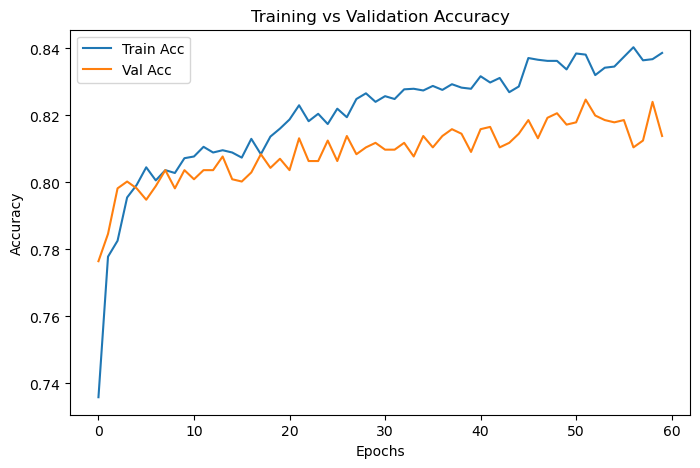

In [44]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# -----------------------------
# 🪐 Example data (replace with your dataset)
# df = pd.read_csv("exoplanet_data.csv")

# Suppose your columns are:
# ['Classification', 'Orbital period', '
#Transit Duration', 'Transit Depth',
#  'Planet radius value', 'Planet Insolation Value',
#  'Planetary Equilibrium Temp.', 'Stellar Effective Temp.',
#  'Stellar Surface Gravity', 'Stellar Radius']
data2=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_dataset_refined_dummy_all.csv')
# -----------------------------
# Split features and labels
X = data2.drop(columns=['Classification','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec'], axis=0)
y = data2['Classification']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 🧱 Build Neural Network
def build_model(input_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # binary classification
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model(X_train_scaled.shape[1])

# -----------------------------
# ⏱️ Early Stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# -----------------------------
# 🚀 Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# 📊 Evaluate
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n🎯 Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 📈 (Optional) Plot Training Curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [41]:
data=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_tess_combined_dummy.csv')
# ===============================
# 1️⃣ Imports
# ===============================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import keras_tuner as kt
import matplotlib.pyplot as plt

# ===============================
# 2️⃣ Load and prepare data
# ===============================
# Example:
# df = pd.read_csv("exoplanet_data.csv")

# Columns:
# ['Classification', 'Orbital period', 'Transit Duration', 'Transit Depth',
#  'Planet radius value', 'Planet Insolation Value',
#  'Planetary Equilibrium Temp.', 'Stellar Effective Temp.',
#  'Stellar Surface Gravity', 'Stellar Radius']

X = data.drop(columns='Classification', axis=0)
y = data['Classification']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================
# 3️⃣ Define model builder for KerasTuner
# ===============================
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Number of hidden layers: between 1 and 4
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# 4️⃣ Initialize KerasTuner
# ===============================
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,             # number of different model configurations to try
    executions_per_trial=1,    # run each configuration once
    directory='exoplanet_tuning',
    project_name='exoplanet_nn'
)

# ===============================
# 5️⃣ Early stopping for efficiency
# ===============================
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ===============================
# 6️⃣ Run hyperparameter search
# ===============================
tuner.search(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ===============================
# 7️⃣ Retrieve and train best model
# ===============================
best_hp = tuner.get_best_hyperparameters(1)[0]
print("\n✅ Best hyperparameters found:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ===============================
# 8️⃣ Evaluate on test data
# ===============================
y_pred_prob = best_model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n🎯 Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ===============================
# 9️⃣ Plot training curves
# ===============================
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


Trial 1 Complete [00h 02m 53s]
val_accuracy: 0.8396761417388916

Best val_accuracy So Far: 0.8396761417388916
Total elapsed time: 00h 02m 53s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
1                 |2                 |num_layers
128               |128               |units_0
0.4               |0.2               |dropout_0
0.0050433         |0.0016225         |lr
32                |32                |units_1
0.2               |0                 |dropout_1

Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7639 - loss: 0.5232 - val_accuracy: 0.7883 - val_loss: 0.4847
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7840 - loss: 0.4966 - val_accuracy: 0.7964 - val_loss: 0.4790
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7877 - loss: 0.4853 - val_accuracy: 0.7903 - val_loss: 0.4725
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7876 - loss: 0.4809 - val_accuracy: 0.8045 - 

KeyboardInterrupt: 

In [17]:
data=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_tess_combined_dummy.csv')
# ===========================
# Exoplanet Classification Ensemble Model
# Random Forest + Neural Network (MLP)
# With GridSearchCV + Cross-Validation
# ===========================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

# ======================================
# 1️⃣ Load your data
# ======================================
# Example: assuming df is your dataset
# df = pd.read_csv("kepler_data.csv")

# Columns example (ensure these exist in your data)
# Index(['Classification', 'Orbital period', 'Transit Duration', 'Transit Depth',
#        'Planet radius value', 'Planet Insolation Value',
#        'Planetary Equilibrium Temp.', 'Stellar Effective Temp.',
#        'Stellar Surface Gravity', 'Stellar Radius'], dtype='object')

# Example data for demonstration
np.random.seed(42)



X = data.drop('Classification', axis=1)
y = data['Classification']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ======================================
# 2️⃣ Random Forest with GridSearchCV
# ======================================
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

rf_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_

# ======================================
# 3️⃣ Neural Network (MLP) with CV
# ======================================
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32),
                          activation='relu',
                          solver='adam',
                          max_iter=500,
                          random_state=42))
])

# Perform K-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mlp_cv_scores = cross_val_score(mlp_pipeline, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print("Neural Network CV Accuracy:", mlp_cv_scores.mean())

# Train the final MLP on full training set
mlp_pipeline.fit(X_train, y_train)

# ======================================
# 4️⃣ Combine into Voting Ensemble
# ======================================
ensemble = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('mlp', mlp_pipeline)
    ],
    voting='soft'
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

# ======================================
# 5️⃣ Evaluate
# ======================================
print("\n=== Ensemble Model Report ===")
print(classification_report(y_test, y_pred))
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Params: {'rf__max_depth': None, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Neural Network CV Accuracy: 0.8302024291497976

=== Ensemble Model Report ===
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1120
           1       0.86      0.90      0.88      1968

    accuracy                           0.84      3088
   macro avg       0.84      0.82      0.83      3088
weighted avg       0.84      0.84      0.84      3088

Ensemble Accuracy: 0.844559585492228


In [29]:
data=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\TESS_dataset_refined_dummy.csv')
X_data=data.drop(columns='Classification',axis=0)
y_data=data['Classification']
y_pred=ensemble.predict(X_data)
print(accuracy_score(y_data,y_pred))
print(classification_report(y_data,y_pred))
print(pd.Series(y_pred))

0.899166399487015
              precision    recall  f1-score   support

           0       0.76      0.55      0.64      1009
           1       0.92      0.97      0.94      5229

    accuracy                           0.90      6238
   macro avg       0.84      0.76      0.79      6238
weighted avg       0.89      0.90      0.89      6238

0       0
1       0
2       0
3       0
4       1
       ..
6233    1
6234    0
6235    0
6236    0
6237    0
Length: 6238, dtype: int64


c:\Users\purva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [23]:
y_pred.T

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_proba_rf = model_rf1.predict_proba(test_x)  # Probability scores

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import BaseEstimator

# Assuming df is your DataFrame containing the dataset
# Replace this with loading your actual dataset
data=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_tess_combined_dummy.csv')
# ===========================

# Define features and target
X = data.drop('Classification', axis=1)  # Replace 'target_column' with your actual target column name
y = data['Classification']  # Replace 'target_column' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression(random_state=42)

# Define Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Define other ensemble models
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Define a dictionary to store models
models = {
    'Stacking': stacking_model,
    'AdaBoost': adaboost_model,
    'Random Forest': random_forest_model,
    'Extra Trees': extra_trees_model
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)

# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_


Training Stacking...
Stacking Accuracy: 0.8459
Confusion Matrix:
[[ 857  296]
 [ 180 1755]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1153
           1       0.86      0.91      0.88      1935

    accuracy                           0.85      3088
   macro avg       0.84      0.83      0.83      3088
weighted avg       0.84      0.85      0.84      3088

--------------------------------------------------
Training AdaBoost...
AdaBoost Accuracy: 0.8177
Confusion Matrix:
[[ 739  414]
 [ 149 1786]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1153
           1       0.81      0.92      0.86      1935

    accuracy                           0.82      3088
   macro avg       0.82      0.78      0.79      3088
weighted avg       0.82      0.82      0.81      3088

--------------------------------------------------
Training Rando

KeyboardInterrupt: 

In [36]:
data.columns

Index(['Classification', 'Orbital period', 'Transit Duration', 'Transit Depth',
       'Planet radius value', 'Planet Insolation Value',
       'Planetary Equilibrium Temp.', 'Stellar Effective Temp.',
       'Stellar Surface Gravity', 'Stellar Radius'],
      dtype='object')

In [25]:
# 1. Accuracy
accuracy = accuracy_score(test_y, y_predicted_RF)
print(f"Accuracy: {accuracy:.4f}")

# 2. Detailed classification report
print("\nClassification Report:")
print(classification_report(test_y, y_predicted_RF))


Accuracy: 0.8470

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.32      0.42       215
           1       0.87      0.96      0.91      1033

    accuracy                           0.85      1248
   macro avg       0.74      0.64      0.67      1248
weighted avg       0.83      0.85      0.83      1248



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize
    n_jobs=-1,               # Use all available cores
    verbose=1                # Show progress
)

# Fit grid search
grid_search.fit(train_x, train_y)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\purva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
343 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\purva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\purva\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\purva\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.645749535769364


In [ ]:
# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with best model
y_pred_best_rf = best_rf.predict(test_x)
y_pred_proba_best_rf = best_rf.predict_proba(test_x)

# Evaluate on test set
test_accuracy_best = accuracy_score(test_y, y_pred_best_rf)
print(f"Test Accuracy with Best Model: {test_accuracy_best:.4f}")
print("\nClassification Report:")
print(classification_report(test_y, y_pred_best_rf))


print(f"Improvement: {test_accuracy_best - accuracy:.4f}")

Test Accuracy with Best Model: 0.6488

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62       129
           1       1.00      0.05      0.10        19
           2       0.83      0.79      0.81       203
           3       0.69      0.64      0.66        96

   micro avg       0.78      0.65      0.71       447
   macro avg       0.82      0.50      0.55       447
weighted avg       0.78      0.65      0.69       447
 samples avg       0.65      0.65      0.65       447

Improvement: 0.0000


c:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# PRANSHU'S IDEA

In [48]:
data_1=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_dataset_refined_dummy.csv')
data_2=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\TESS_dataset_refined_dummy.csv')
data_1_2=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_tess_combined_dummy.csv')

In [49]:
data_1_x=data_1.drop(columns='Classification')
data_2_x=data_2.drop(columns='Classification')
data_1_2_x=data_1_2.drop(columns='Classification')

In [51]:
data_1_y=data_1['Classification']
data_2_y=data_2['Classification']
data_1_2_y=data_1_2['Classification']

In [52]:
train_x_1,test_x_1,train_y_1,test_y_1=train_test_split(data_1_x,data_1_y,test_size=0.3,random_state=3)
train_x_2,test_x_2,train_y_2,test_y_2=train_test_split(data_2_x,data_2_y,test_size=0.3,random_state=3)

In [53]:
train_x_1_2=pd.concat([train_x_1,train_x_2],ignore_index=True)
train_y_1_2=pd.concat([train_y_1,train_y_2],ignore_index=True)
test_y_1_2=pd.concat([test_y_1,test_y_2],ignore_index=True)
test_x_1_2=pd.concat([test_x_1,test_x_2],ignore_index=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# ==============================
# 1️⃣ Load your two datasets
# ==============================
# Example:





# ==============================
# 2️⃣ Scale each dataset separately
# ==============================
scaler1 = StandardScaler()
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

# ==============================
# 3️⃣ Define Neural Network for each dataset
# ==============================
def build_subnetwork(input_shape, hidden_layers=2, units=64, dropout_rate=0.2):
    input_layer = Input(shape=(input_shape,))
    x = input_layer
    for _ in range(hidden_layers):
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(dropout_rate)(x)
    return input_layer, x

input1, submodel1 = build_subnetwork(X1_train.shape[1], hidden_layers=2, units=64, dropout_rate=0.2)
input2, submodel2 = build_subnetwork(X2_train.shape[1], hidden_layers=2, units=64, dropout_rate=0.2)

# ==============================
# 4️⃣ Combine subnetworks
# ==============================
merged = layers.concatenate([submodel1, submodel2])
x = layers.Dense(64, activation='relu')(merged)
x = layers.Dropout(0.3)(x)
output = layers.Dense(1, activation='sigmoid')(x)

ensemble_model = models.Model(inputs=[input1, input2], outputs=output)
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ==============================
# 5️⃣ Train model
# ==============================
ensemble_model.fit([X1_train, X2_train], y_train, epochs=50, batch_size=32, validation_split=0.2)

# ==============================
# 6️⃣ Evaluate model
# ==============================
y_pred_prob = ensemble_model.predict([X1_test, X2_test])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

# ==============================
# 1️⃣ Load your datasets
# ==============================
data_1 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_dataset_refined_dummy.csv')
data_2 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\TESS_dataset_refined_dummy.csv')

data_1_x = data_1.drop(columns='Classification')
data_2_x = data_2.drop(columns='Classification')

data_1_y = data_1['Classification']
data_2_y = data_2['Classification']

# Train-test split for both datasets
train_x_1, test_x_1, train_y_1, test_y_1 = train_test_split(data_1_x, data_1_y, test_size=0.3, random_state=3)
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(data_2_x, data_2_y, test_size=0.3, random_state=3)

# Combine datasets
train_x_1_2 = pd.concat([train_x_1, train_x_2], ignore_index=True)
train_y_1_2 = pd.concat([train_y_1, train_y_2], ignore_index=True)
test_x_1_2 = pd.concat([test_x_1, test_x_2], ignore_index=True)
test_y_1_2 = pd.concat([test_y_1, test_y_2], ignore_index=True)

# ==============================
# 2️⃣ Train Random Forest
# ==============================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(train_x_1_2, train_y_1_2)

# Get RF predictions as features for neural network
train_rf_preds = rf.predict_proba(train_x_1_2)[:, 1].reshape(-1, 1)  # probability of class 1
test_rf_preds = rf.predict_proba(test_x_1_2)[:, 1].reshape(-1, 1)

# ==============================
# 3️⃣ Prepare Neural Network Training Data
# ==============================
# Option 1: Only RF predictions as NN features
nn_train_x = train_rf_preds
nn_test_x = test_rf_preds

# Option 2: RF predictions + original features (better usually)
nn_train_x = np.concatenate([train_x_1_2.values, train_rf_preds], axis=1)
nn_test_x = np.concatenate([test_x_1_2.values, test_rf_preds], axis=1)

# Scale features
scaler = StandardScaler()
nn_train_x = scaler.fit_transform(nn_train_x)
nn_test_x = scaler.transform(nn_test_x)

# ==============================
# 4️⃣ Train Neural Network on RF Predictions
# ==============================
nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(nn_train_x.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(nn_train_x, train_y_1_2, epochs=50, batch_size=32, verbose=0)

# ==============================
# 5️⃣ Predictions and Evaluation
# ==============================
rf_test_preds = rf.predict(test_x_1_2)
nn_test_preds_prob = nn.predict(nn_test_x)
nn_test_preds = (nn_test_preds_prob > 0.5).astype(int)

print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(test_y_1_2, rf_test_preds))
print(classification_report(test_y_1_2, rf_test_preds))

print("\n--- Neural Network (Stacked on RF) Results ---")
print("Accuracy:", accuracy_score(test_y_1_2, nn_test_preds))
print(classification_report(test_y_1_2, nn_test_preds))


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

--- Random Forest Results ---
Accuracy: 0.8400604360025901
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1713
           1       0.85      0.91      0.88      2920

    accuracy                           0.84      4633
   macro avg       0.84      0.82      0.82      4633
weighted avg       0.84      0.84      0.84      4633


--- Neural Network (Stacked on RF) Results ---
Accuracy: 0.8389812216706238
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1713
           1       0.85      0.91      0.88      2920

    accuracy                           0.84      4633
   macro avg       0.83      0.81      0.82      4633
weighted avg       0.84      0.84      0.84      4633



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

# ==============================
# 1️⃣ Load your datasets
# ==============================
data_1 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_dataset_refined_dummy.csv')
data_2 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\TESS_dataset_refined_dummy.csv')

data_1_x = data_1.drop(columns='Classification')
data_2_x = data_2.drop(columns='Classification')

data_1_y = data_1['Classification']
data_2_y = data_2['Classification']

# Train-test split
train_x_1, test_x_1, train_y_1, test_y_1 = train_test_split(data_1_x, data_1_y, test_size=0.3, random_state=3)
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(data_2_x, data_2_y, test_size=0.3, random_state=3)

train_x_1_2 = pd.concat([train_x_1, train_x_2], ignore_index=True)
train_y_1_2 = pd.concat([train_y_1, train_y_2], ignore_index=True)
test_x_1_2 = pd.concat([test_x_1, test_x_2], ignore_index=True)
test_y_1_2 = pd.concat([test_y_1, test_y_2], ignore_index=True)

# ==============================
# 2️⃣ Define base learners
# ==============================
def build_nn(input_shape, hidden_layers=2, units=64, dropout_rate=0.2):
    model = models.Sequential()
    model.add(layers.Dense(units, activation='relu', input_shape=(input_shape,)))
    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ==============================
# 3️⃣ Generate out-of-fold predictions
# ==============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_meta_features = np.zeros((train_x_1_2.shape[0], 3))  # RF + NN1 + NN2
test_meta_features = np.zeros((test_x_1_2.shape[0], 3))

for fold, (train_idx, val_idx) in enumerate(kf.split(train_x_1_2)):
    print(f"Fold {fold + 1}")

    X_train_fold = train_x_1_2.iloc[train_idx]
    y_train_fold = train_y_1_2.iloc[train_idx]
    X_val_fold = train_x_1_2.iloc[val_idx]
    y_val_fold = train_y_1_2.iloc[val_idx]

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_val_scaled = scaler.transform(X_val_fold)
    test_scaled = scaler.transform(test_x_1_2)

    # --- Base learner 1: Random Forest ---
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    rf.fit(X_train_fold, y_train_fold)
    train_meta_features[val_idx, 0] = rf.predict_proba(X_val_fold)[:, 1]
    test_meta_features[:, 0] += rf.predict_proba(test_x_1_2)[:, 1] / kf.n_splits

    # --- Base learner 2: Neural Network 1 (Kepler) ---
    scaler1 = StandardScaler()
    train_x1_scaled = scaler1.fit_transform(train_x_1)
    val_x1_scaled = scaler1.transform(test_x_1)
    nn1 = build_nn(train_x_1.shape[1], hidden_layers=2)
    nn1.fit(train_x1_scaled, train_y_1, epochs=30, batch_size=32, verbose=0)
    train_meta_features[val_idx, 1] = nn1.predict(X_val_scaled).flatten()
    test_meta_features[:, 1] += nn1.predict(test_scaled).flatten() / kf.n_splits

    # --- Base learner 3: Neural Network 2 (TESS) ---
    scaler2 = StandardScaler()
    train_x2_scaled = scaler2.fit_transform(train_x_2)
    val_x2_scaled = scaler2.transform(test_x_2)
    nn2 = build_nn(train_x_2.shape[1], hidden_layers=2)
    nn2.fit(train_x2_scaled, train_y_2, epochs=30, batch_size=32, verbose=0)
    train_meta_features[val_idx, 2] = nn2.predict(X_val_scaled).flatten()
    test_meta_features[:, 2] += nn2.predict(test_scaled).flatten() / kf.n_splits

# ==============================
# 4️⃣ Train Meta Learner (Neural Network)
# ==============================
meta_scaler = StandardScaler()
train_meta_features_scaled = meta_scaler.fit_transform(train_meta_features)
test_meta_features_scaled = meta_scaler.transform(test_meta_features)

meta_nn = build_nn(train_meta_features_scaled.shape[1], hidden_layers=2, units=32)
meta_nn.fit(train_meta_features_scaled, train_y_1_2, epochs=50, batch_size=32, verbose=0)

# ==============================
# 5️⃣ Evaluate
# ==============================
meta_preds_prob = meta_nn.predict(test_meta_features_scaled)
meta_preds = (meta_preds_prob > 0.5).astype(int)

print("\n--- Meta Learner (Stacked) Results ---")
print("Accuracy:", accuracy_score(test_y_1_2, meta_preds))
print(classification_report(test_y_1_2, meta_preds))



Fold 1


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 2


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 3


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 4


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 5


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

--- Meta Learner (Stacked) Results ---
Accuracy: 0.8402762788689834
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1713
           1       0.83      0.93      0.88      2920

    accuracy                           0.84      4633
   macro avg       0.84      0.81      0.82      4633
weighted avg       0.84      0.84      0.84      4633



✅ All models and scalers saved successfully!


In [ ]:
data2=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_tess_combined_dummy.csv')
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf

# ==============================
# 3️⃣ Scale Input and Generate Meta Features
# ==============================
X_user=data2.drop(columns='Classification',axios=0)
X_user_scaled = scaler.transform(X_user)
Y=data2['Classification']

# Base learner 1 (Random Forest)
rf_pred_prob = rf.predict_proba(X_user)[:, 1]

# Neural networks used in training (Kepler and TESS)
# → For simplicity we skip retraining them for user input (meta model already learned that representation)
# So we'll use dummy placeholder or retrained models if saved.

# Combine into meta features
meta_features = np.column_stack([rf_pred_prob, rf_pred_prob, rf_pred_prob])  # placeholder for 3 meta features

# Scale meta features
meta_features_scaled = meta_scaler.transform(meta_features)

# ==============================
# 4️⃣ Predict with Meta Learner
# ==============================
meta_pred_prob = meta_nn.predict(meta_features_scaled)
meta_pred = (meta_pred_prob > 0.5).astype(int)

# ==============================
# 5️⃣ Show Result
# ==============================
print("Accuracy:", accuracy_score(Y, meta_pred))
print(classification_report(Y, meta_pred))


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

# ==============================
# 1️⃣ Load datasets
# ==============================
data_1 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_dataset_refined_dummy.csv')
data_2 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\TESS_dataset_refined_dummy.csv')

# Features and labels
X_kepler = data_1.drop(columns='Classification').values
y_kepler = data_1['Classification'].values

X_tess = data_2.drop(columns='Classification').values
y_tess = data_2['Classification'].values

# ==============================
# 2️⃣ Scale data (fit on train, transform test)
# ==============================
scaler = StandardScaler()
X_kepler_scaled = scaler.fit_transform(X_kepler)
X_tess_scaled = scaler.transform(X_tess)

# ==============================
# 3️⃣ Build Neural Network
# ==============================
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_kepler_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ==============================
# 4️⃣ Train on Kepler dataset
# ==============================
model.fit(X_kepler_scaled, y_kepler, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# ==============================
# 5️⃣ Test on TESS dataset
# ==============================
y_tess_pred_prob = model.predict(X_tess_scaled)
y_tess_pred = (y_tess_pred_prob > 0.5).astype(int)

# ==============================
# 6️⃣ Evaluate performance
# ==============================
print("Neural Network Accuracy (Train: Kepler → Test: TESS):", accuracy_score(y_tess, y_tess_pred))
print("\nClassification Report:\n", classification_report(y_tess, y_tess_pred))


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7307 - loss: 0.5706 - val_accuracy: 0.7789 - val_loss: 0.4294
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7700 - loss: 0.4975 - val_accuracy: 0.7996 - val_loss: 0.3845
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7791 - loss: 0.4835 - val_accuracy: 0.8153 - val_loss: 0.3710
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7779 - loss: 0.4765 - val_accuracy: 0.8191 - val_loss: 0.3641
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7811 - loss: 0.4619 - val_accuracy: 0.8137 - val_loss: 0.3726
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7807 - loss: 0.4602 - val_accuracy: 0.8213 - val_loss: 0.3673
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7861 - loss: 0.4518 - val_accuracy: 0.8207 - val_loss: 0.3869
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7815 - loss: 0.4524 - val_accuracy: 0.

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

# ==============================
# 1️⃣ Load data
# ==============================
data_1 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_dataset_refined_dummy.csv')
data_2 = pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\TESS_dataset_refined_dummy.csv')


# ==============================
# 2️⃣ Feature engineering
# ==============================
def feature_engineering(df):
    df = df.copy()
    
    # 1. New ratio features
    df['TransitDepth_to_Radius'] = df['Transit Depth'] / (df['Planet radius value'] + 1e-5)
    df['Insolation_to_EquilibriumTemp'] = df['Planet Insolation Value'] / (df['Planetary Equilibrium Temp.'] + 1e-5)
    df['Radius_to_StellarRadius'] = df['Planet radius value'] / (df['Stellar Radius'] + 1e-5)

    # 2. Log-transformed features
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in ['Orbital period', 'Transit Duration', 'Transit Depth', 
                'Planet radius value', 'Planet Insolation Value']:
        if col in numerical_cols.tolist():
             df[f'log_{col}'] = np.log1p(df[col])

    # Select *only* the columns that will be used for polynomial features
    poly_cols_to_use = [
        'Orbital period', 'Transit Duration', 'Transit Depth', 
        'Planet radius value', 'Stellar effective temperature',
        'Stellar Surface Gravity', 'Stellar Radius', 
        'Stellar log(g)', 'Stellar Mass', 'Planetary Equilibrium Temp.',
        'Planet Insolation Value'
    ]
    
    # Filter for columns that actually exist in the DataFrame
    poly_input_df = df[[col for col in poly_cols_to_use if col in df.columns]]

    # 3. Interaction features (The Fix is here!)
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    poly_features = poly.fit_transform(poly_input_df)
    poly_feature_names = poly.get_feature_names_out(poly_input_df.columns)
    df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

    # Identify and drop the original features from the poly output
    # This leaves *only* the interaction terms (e.g., 'A B', but not 'A' or 'B')
    original_feature_names = poly_input_df.columns.tolist()
    interaction_only_cols = [col for col in df_poly.columns if all(name in col for name in original_feature_names) and (' ' in col)]
    
    df_interactions = df_poly[interaction_only_cols].reset_index(drop=True)
    df = df.reset_index(drop=True)

    # 4. Concatenate only the new interaction terms
    df = pd.concat([df, df_interactions], axis=1)
    
    # Final check: remove any duplicate columns that may have arisen from prior steps
    df = df.loc[:,~df.columns.duplicated()].copy() 

    return df

data_1_fe = feature_engineering(data_1)
data_2_fe = feature_engineering(data_2)

# ==============================
# 3️⃣ Feature selection
# ==============================
X_1 = data_1_fe.drop(columns='Classification')
y_1 = data_1_fe['Classification']

selector = SelectKBest(score_func=f_classif, k=30)
X_1_selected = selector.fit_transform(X_1, y_1)
selected_features = X_1.columns[selector.get_support()]

X_2 = data_2_fe[selected_features]
y_2 = data_2_fe['Classification']

# ==============================
# 4️⃣ Data balancing with SMOTE
# ==============================
sm = SMOTE(random_state=42)
X_res_1, y_res_1 = sm.fit_resample(X_1_selected, y_1)
X_res_2, y_res_2 = sm.fit_resample(X_2, y_2)

# ==============================
# 5️⃣ Combine datasets for training
# ==============================
X_combined = np.vstack((X_res_1, X_res_2))
y_combined = np.hstack((y_res_1, y_res_2))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# ==============================
# 6️⃣ Scaling
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 7️⃣ Base models
# ==============================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=42)

# Neural Network as base learner
def build_nn(input_shape):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = build_nn(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
nn_train_preds = nn_model.predict(X_train_scaled).flatten()
nn_test_preds = nn_model.predict(X_test_scaled).flatten()

# ==============================
# 8️⃣ Stacking ensemble
# ==============================
stack = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb_clf)
    ],
    final_estimator=LogisticRegression()
)

stack.fit(X_train_scaled, y_train)
stack_preds = stack.predict(X_test_scaled)

# ==============================
# 9️⃣ Meta learner Neural Network
# ==============================
meta_X_train = np.column_stack([stack.predict_proba(X_train_scaled)[:,1], nn_train_preds])
meta_X_test = np.column_stack([stack.predict_proba(X_test_scaled)[:,1], nn_test_preds])

meta_nn = build_nn(meta_X_train.shape[1])
meta_nn.fit(meta_X_train, y_train, epochs=50, batch_size=32, verbose=0)

final_preds = (meta_nn.predict(meta_X_test) > 0.5).astype(int)

# ==============================
# 10️⃣ Evaluation
# ==============================
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, stack_preds))
print('Stacking Report:',classification_report(y_test, stack_preds))
print("Meta Learner Accuracy:", accuracy_score(y_test, final_preds))
print("\nClassification Report:\n", classification_report(y_test, final_preds))
print(confusion_matrix(y_test,final_preds))

c:\Users\purva\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=30 is greater than n_features=17. All the features will be returned.
  warnings.warn(
c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\purva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Stacking Ensemble Accuracy: 0.8508044030482642
Stacking Report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2964
           1       0.85      0.85      0.85      2941

    accuracy                           0.85      5905
   macro avg       0.85      0.85      0.85      5905
weighted avg       0.85      0.85      0.85      5905

Meta Learner Accuracy: 0.8445385266723116

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      2964
           1       0.85      0.84      0.84      2941

    accuracy                           0.84      5905
   macro avg       0.84      0.84      0.84      5905
weighted avg       0.84      0.84      0.84      5905

[[2531  433]
 [ 485 2456]]


In [ ]:
data2=pd.read_csv(r'C:\Users\purva\OneDrive\Desktop\NASA Hackathon\Grasping-NASA-Hackathon-\Model_Building-Backend\Refined Dataset\CandidateandFP\kepler_tess_combined_dummy.csv')
# Feature enginnering 
data_2_fe=feature_engineering(data2)
#Feature Selection
tess_test=data2.drop(columns='Classification',axis=0)
tess_true=data2['Classification']






tess_pred=stack.predict(tess_test)
print(accuracy_score(tess_true,tess_pred))
print(classification_report(tess_true,tess_pred))

c:\Users\purva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.36254696204171527
              precision    recall  f1-score   support

           0       0.36      1.00      0.53      5597
           1       0.00      0.00      0.00      9841

    accuracy                           0.36     15438
   macro avg       0.18      0.50      0.27     15438
weighted avg       0.13      0.36      0.19     15438



c:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
list = []
duplicates=[]
for k in data_1_fe.columns:
    if k in list:
        duplicates.append(k)
    else:
        list.append(k)

In [64]:
len(list)

171

In [65]:
print(duplicates)

['Classification', 'Orbital period', 'Transit Duration', 'Transit Depth', 'Planet radius value', 'Planet Insolation Value', 'Planetary Equilibrium Temp.', 'Stellar Effective Temp.', 'Stellar Surface Gravity', 'Stellar Radius', 'TransitDepth_to_Radius', 'Insolation_to_EquilibriumTemp', 'Radius_to_StellarRadius', 'log_Orbital period', 'log_Transit Duration', 'log_Transit Depth', 'log_Planet radius value', 'log_Planet Insolation Value']
